In [1]:
import pandas as pd

# 파일을 로드
cleaned_df = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/cleaned_data.csv')

In [2]:
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

In [3]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Spectral 클러스터링 수행
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
cleaned_df['Spectral_Cluster'] = spectral.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
spectral_counts = cleaned_df['Spectral_Cluster'].value_counts()

labels = spectral.fit_predict(data_for_clustering)

In [4]:
# 클러스터링 결과를 데이터프레임에 추가
data_for_clustering['Cluster'] = labels

# 클러스터 중심 및 경계 계산
# 각 클러스터에 대한 각 변수의 중앙값을 계산
centroids = data_for_clustering.groupby('Cluster').median()

# 각 클러스터에 대한 각 변수의 최소 및 최대값을 계산하여 경계를 정의
boundaries = data_for_clustering.groupby('Cluster').agg(['min', 'max'])

C:\Users\82106\AppData\Local\Temp\ipykernel_7868\790995311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Cluster'] = labels


In [5]:
import pandas as pd

# 클러스터 중심과 경계값 데이터 프레임 예시
centroids = pd.DataFrame({
    'PER': [23.32, 28.89, 27.30, 22.95],
    'DividendYield': [2.67, 1.26, 1.49, 2.79],
    'Beta': [0.83, 1.04, 0.98, 0.91],
    'RSI': [62.11, 60.19, 62.05, 58.82],
    'volume': [7492383, 3553733, 21191280, 1572210],
    'Volatility': [0.01492, 0.01625, 0.01270, 0.01477]
}, index=['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3'])

def get_user_input(feature_name):
    """사용자 입력을 받고 유효성을 검사하는 함수."""
    while True:
        value = input(f"Enter {feature_name} (high, medium, low): ").strip().lower()
        if value in ['high', 'medium', 'low']:
            return value
        else:
            print("Invalid input. Please enter 'high', 'medium', or 'low'.")

# 사용자 입력 받기
user_input = {
    'PER': get_user_input('PER'),
    'DividendYield': get_user_input('DividendYield'),
    'Beta': get_user_input('Beta'),
    'RSI': get_user_input('RSI'),
    'volume': get_user_input('volume'),
    'Volatility': get_user_input('Volatility')
}

print("User input received:", user_input)

# 입력을 실제 값 범위로 매핑
def map_input(cluster_feature, feature_value):
    if feature_value == 'high':
        return cluster_feature.max()
    elif feature_value == 'medium':
        return cluster_feature.mean()
    elif feature_value == 'low':
        return cluster_feature.min()

# 각 클러스터에 대해 가장 적합한지 평가
def evaluate_cluster_fit(user_values, centroids):
    distances = []
    for index, row in centroids.iterrows():
        distance = sum((user_values[feature] - row[feature])**2 for feature in user_values.keys())
        distances.append(distance)
    return distances.index(min(distances))

# 사용자 값 범위 매핑
mapped_values = {feature: map_input(centroids[feature], value) for feature, value in user_input.items()}

# 가장 적합한 클러스터 찾기
closest_cluster = evaluate_cluster_fit(mapped_values, centroids)

tickers_in_cluster = cleaned_df[cleaned_df['Spectral_Cluster'] == closest_cluster]['Ticker'].tolist()
print(f"The most suitable cluster for the given input is: Cluster {closest_cluster}")
print("Tickers in the selected cluster:", tickers_in_cluster)

User input received: {'PER': 'low', 'DividendYield': 'high', 'Beta': 'high', 'RSI': 'high', 'volume': 'high', 'Volatility': 'high'}
The most suitable cluster for the given input is: Cluster 2
Tickers in the selected cluster: ['AAPL', 'BRK-B', 'V', 'MA', 'WMT', 'CVX', 'ORCL', 'NKE', 'IBM', 'TMO', 'HON', 'LIN', 'LOW', 'LMT', 'GS', 'BKNG', 'MDLZ', 'D', 'CB', 'CL', 'PLD', 'LRCX']


### 포트폴리오 최적화:  효율적 투자선(샤프비율 최대화)

In [6]:
import pandas as pd

stock_data = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/stock_data.csv')

In [7]:
# stock_data에서 지정된 티커들만 선택
selected_data = stock_data[tickers_in_cluster]

In [8]:
# 일간 수익률 계산
returns = selected_data.pct_change().dropna()

# 연간 수익률 계산
mean_returns = returns.mean() * 252

# 공분산 행렬 계산
cov_matrix = returns.cov() * 252

# 출력으로 확인
print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

Mean Returns:
 AAPL     0.697806
BRK-B    0.066674
V        0.231144
MA       0.283791
WMT      0.258996
CVX     -0.109199
ORCL     0.276098
NKE      0.423230
IBM      0.049881
TMO      0.420468
HON      0.280572
LIN      0.310943
LOW      0.442057
LMT     -0.009842
GS       0.262637
BKNG     0.196156
MDLZ     0.146286
D        0.041097
CB       0.117221
CL       0.292828
PLD      0.245985
LRCX     0.707805
dtype: float64
Covariance Matrix:
            AAPL     BRK-B         V        MA       WMT       CVX      ORCL  \
AAPL   0.218845  0.106950  0.141882  0.158209  0.079360  0.141568  0.123329   
BRK-B  0.106950  0.122634  0.124654  0.136345  0.052121  0.170985  0.101767   
V      0.141882  0.124654  0.183411  0.198071  0.057660  0.202351  0.116577   
MA     0.158209  0.136345  0.198071  0.240963  0.059375  0.217709  0.127276   
WMT    0.079360  0.052121  0.057660  0.059375  0.099998  0.046156  0.077133   
CVX    0.141568  0.170985  0.202351  0.217709  0.046156  0.375242  0.128736   
O

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 샤프 비율 최대화 함수
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # 최대화를 위해 샤프 비율의 음수값 반환

# 변동성 및 수익률 계산 함수
def get_ret_vol_sr(weights):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - 0.01) / portfolio_volatility
    return np.array([portfolio_return, portfolio_volatility, sharpe_ratio])

In [10]:
# 몬테카를로 시뮬레이션을 이용한 효율적 투자선 계산
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(mean_returns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    all_weights[ind, :] = weights
    ret_vol_sr = get_ret_vol_sr(weights)
    ret_arr[ind] = ret_vol_sr[0]
    vol_arr[ind] = ret_vol_sr[1]
    sharpe_arr[ind] = ret_vol_sr[2]

# 최대 샤프 비율 포트폴리오 찾기
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_return = ret_arr[max_sharpe_idx]
max_sharpe_volatility = vol_arr[max_sharpe_idx]

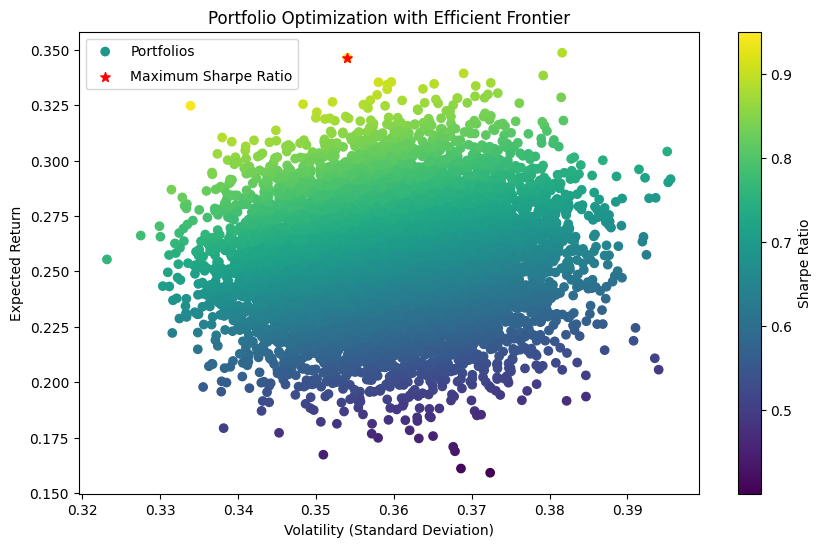

In [11]:
# 효율적 투자선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', s=50, marker='*', label='Maximum Sharpe Ratio')
plt.title('Portfolio Optimization with Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend(labelspacing=0.8)
plt.show()

In [12]:
# 전체 투자 자본 설정
total_capital = 100000  # 예: 100,000 USD

# 최적 포트폴리오의 가중치
optimal_weights = all_weights[max_sharpe_idx]

# 투자할 각 티커에 대한 금액 계산
investment_per_ticker = total_capital * optimal_weights

# 결과 출력
print("Investment per Ticker:")
for ticker, capital in zip(tickers_in_cluster, investment_per_ticker):
    print(f"{ticker}: ${capital:.2f}")

# 추가 정보 출력
print("\nTotal Investment: $", total_capital)
print("Expected Return of the Portfolio: ", max_sharpe_return)
print("Expected Volatility of the Portfolio: ", max_sharpe_volatility)

Investment per Ticker:
AAPL: $8470.10
BRK-B: $1202.94
V: $2330.73
MA: $3898.11
WMT: $10117.00
CVX: $405.27
ORCL: $6225.11
NKE: $8978.39
IBM: $254.77
TMO: $9977.39
HON: $6525.44
LIN: $1935.70
LOW: $349.76
LMT: $367.99
GS: $4068.92
BKNG: $9731.30
MDLZ: $2471.01
D: $552.17
CB: $3069.00
CL: $960.50
PLD: $10207.24
LRCX: $7901.17

Total Investment: $ 100000
Expected Return of the Portfolio:  0.34627957636874096
Expected Volatility of the Portfolio:  0.35404395653241566
